In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# dropping coloumns according to p Values and R2_adjusted

In [2]:
dataset = pd.read_csv('50_Startups.csv',delimiter = ";")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          49 non-null float64
Administration     49 non-null float64
Marketing Spend    49 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


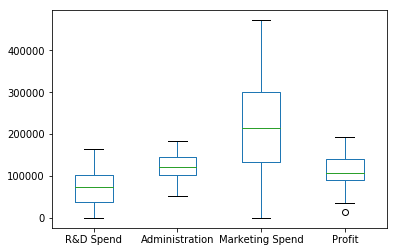

In [4]:
dataset.plot.box()

In [5]:
dataset = dataset.fillna(dataset.mean())

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [7]:
X = dataset.iloc[:,:-1]

In [8]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [9]:
Y = dataset.iloc[:,-1]

In [10]:
Y = Y.values.reshape(-1,1)

In [11]:
Y = pd.DataFrame(Y)

In [12]:
Y.shape

(50, 1)

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE1 = LabelEncoder()
X.State = LE1.fit_transform(X.State)
OHE = OneHotEncoder(categorical_features = [3])
X = OHE.fit_transform(X.values).toarray()
X.shape

c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(50, 6)

In [14]:
X = pd.DataFrame(X)
X.head()
X = X.drop([1],axis = 1)
X.head()

,0,2,3,4,5
0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,162597.70,151377.59,443898.53
2,0.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,0.0,142107.34,91391.77,366168.42


In [15]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler()
Y_s = StandardScaler()
X = X_s.fit_transform(X)
Y = Y_s.fit_transform(Y)

{'whiskers': [<matplotlib.lines.Line2D at 0x54397d9c50>,
 'caps': [<matplotlib.lines.Line2D at 0x54397e5320>,
 'boxes': [<matplotlib.lines.Line2D at 0x54397d9828>,
 'medians': [<matplotlib.lines.Line2D at 0x54397e5978>,
 'fliers': [<matplotlib.lines.Line2D at 0x54397e5cc0>,
 'means': []}

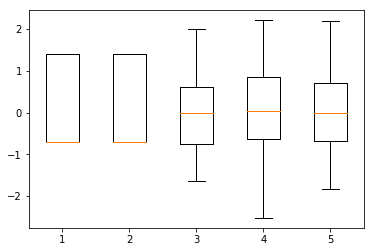

In [16]:
plt.boxplot(X)


In [17]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,-0.717741,1.393261,2.011531,0.561826,2.187271
1,1.393261,-0.717741,1.950880,1.083894,1.949436
2,-0.717741,-0.717741,1.749052,-0.727219,1.642701
3,-0.717741,1.393261,1.549143,-0.095309,1.431738
4,-0.717741,-0.717741,1.499214,-1.078891,1.286479


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)
regressor.intercept_,regressor.coef_

(array([-7.28857844e-16]),
 array([[ 0.01165348,  0.0059028 ,  0.89825659, -0.01282542,  0.10233165]]))

In [19]:
Y_pred_ss = regressor.predict(X)

In [20]:
Y_pred_ss


array([[ 2.02335193],
       [ 1.94997787],
       [ 1.73592336],
       [ 1.53912231],
       [ 1.47956318],
       [ 1.2826789 ],
       [ 1.12190109],
       [ 1.18379346],
       [ 0.99091426],
       [ 1.07107018],
       [ 0.55525527],
       [ 0.58194159],
       [ 0.40619092],
       [ 0.39242421],
       [ 0.91487699],
       [ 0.84031243],
       [ 0.13225452],
       [ 0.45472047],
       [ 0.40974526],
       [ 0.22902853],
       [ 0.13094829],
       [ 0.14357685],
       [ 0.0622319 ],
       [-0.0572547 ],
       [ 0.00322066],
       [-0.25065347],
       [-0.06963646],
       [ 0.07782308],
       [-0.28501545],
       [-0.27730158],
       [-0.3579411 ],
       [-0.38215075],
       [-0.35092992],
       [-0.00476635],
       [-0.55660005],
       [-0.54791354],
       [-0.9271693 ],
       [-0.56606172],
       [-1.06729211],
       [-0.70907454],
       [-0.92156713],
       [-0.95484344],
       [-1.0341152 ],
       [-1.31991599],
       [-1.19463463],
       [-1

In [21]:
import sklearn.metrics as eva
eva.mean_squared_error(Y,Y_pred_ss),eva.mean_squared_error(Y,Y_pred_ss)**0.5

(0.051525672864348705, 0.22699267138907525)

In [22]:
eva.r2_score(Y,Y_pred_ss)

0.9484743271356513

In [23]:
eva.mean_absolute_error(Y,Y_pred_ss)

0.16516295062146985

In [24]:
Y_s.inverse_transform(Y_pred_ss)

array([[192746.57208388],
       [189818.86779033],
       [181277.8608671 ],
       [173425.28583892],
       [171048.81230366],
       [163192.91616057],
       [156777.70761813],
       [159247.28004318],
       [151551.19131758],
       [154749.49934714],
       [134167.92586777],
       [135232.73879216],
       [128220.09686138],
       [127670.79019987],
       [148517.22171911],
       [145542.01520073],
       [117289.73770613],
       [130156.47824364],
       [128361.91861354],
       [121151.12572813],
       [117237.6177366 ],
       [117741.51088745],
       [114495.759464  ],
       [109728.11462569],
       [112141.14702199],
       [102011.29420317],
       [109234.0690816 ],
       [115117.86432387],
       [100640.2140353 ],
       [100948.00570951],
       [ 97730.4017188 ],
       [ 96764.41034582],
       [ 98010.1554337 ],
       [111822.45674138],
       [ 89803.69457774],
       [ 90150.29568438],
       [ 75017.58024316],
       [ 89426.16378087],
       [ 694

In [25]:

1 - (1-eva.r2_score(Y,Y_pred_ss))*((Y.shape[0]-1)/(Y.shape[0]-X.shape[1]-1))

0.9426191370374298

In [26]:
X[:5]

array([[-0.71774056,  1.39326109,  2.0115306 ,  0.56182648,  2.18727067],
       [ 1.39326109, -0.71774056,  1.95087978,  1.08389447,  1.94943591],
       [-0.71774056, -0.71774056,  1.74905153, -0.72721882,  1.64270066],
       [-0.71774056,  1.39326109,  1.54914299, -0.09530909,  1.43173764],
       [-0.71774056, -0.71774056,  1.49921446, -1.0788908 ,  1.2864793 ]])

In [27]:
Y[:5]

array([[2.01120333],
       [1.99942997],
       [1.98084225],
       [1.77662724],
       [1.35774012]])

In [28]:
X = np.append(X_s.fit_transform(np.ones((50,1))).astype(int), values = X,axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x5439b55e10>,
 'caps': [<matplotlib.lines.Line2D at 0x5439b614a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x5439b55a20>,
 'medians': [<matplotlib.lines.Line2D at 0x5439b61b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x5439b61e80>,
 'means': []}

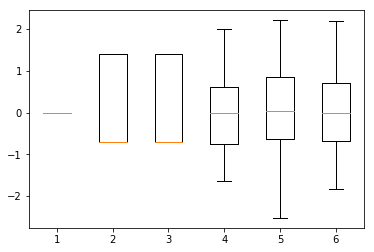

In [29]:
plt.boxplot(X)

In [31]:
import statsmodels.formula.api as sm
SL = 0.05

regressor = sm.OLS(endog=Y,exog=X).fit()

In [32]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,0.0,-0.717741,1.393261,2.011531,0.561826,2.187271
1,0.0,1.393261,-0.717741,1.950880,1.083894,1.949436
2,0.0,-0.717741,-0.717741,1.749052,-0.727219,1.642701
3,0.0,-0.717741,1.393261,1.549143,-0.095309,1.431738
4,0.0,-0.717741,-0.717741,1.499214,-1.078891,1.286479


In [33]:

regressor.summary()

c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in les

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           8.46e-28
Time:                        14:23:38   Log-Likelihood:                 3.1950
No. Observations:                  50   AIC:                             3.610
Df Residuals:                      45   BIC:                             13.17
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1             0.0117      0.041      0.287      0.775      -0.070       0.093
x2             0.0059      0.040      0.149      0.883      -0.074       0.086
x3             0.8983      0.056     16.140      0.000       0.786       1.010
x4            -0.0128      0.036     -0.354      0.725      -0.086       0.060
x5             0.1023      0.055      1.868      0.068      -0.008       0.213
==============================================================================
Omnibus:                       12.594   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.322
Skew:                          -0.852   Prob(JB):                     0.000286
Kurtosis:                       5.220   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
X = pd.DataFrame(X)

In [35]:
X.head()

,0,1,2,3,4,5
0,0.0,-0.717741,1.393261,2.011531,0.561826,2.187271
1,0.0,1.393261,-0.717741,1.950880,1.083894,1.949436
2,0.0,-0.717741,-0.717741,1.749052,-0.727219,1.642701
3,0.0,-0.717741,1.393261,1.549143,-0.095309,1.431738
4,0.0,-0.717741,-0.717741,1.499214,-1.078891,1.286479


In [36]:
X.columns = ["const","OHE1","OHE2","R&D","Admin","Marketing"]

In [37]:
X.head()

,const,OHE1,OHE2,R&D,Admin,Marketing
0,0.0,-0.717741,1.393261,2.011531,0.561826,2.187271
1,0.0,1.393261,-0.717741,1.950880,1.083894,1.949436
2,0.0,-0.717741,-0.717741,1.749052,-0.727219,1.642701
3,0.0,-0.717741,1.393261,1.549143,-0.095309,1.431738
4,0.0,-0.717741,-0.717741,1.499214,-1.078891,1.286479


In [38]:
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           8.46e-28
Time:                        14:23:39   Log-Likelihood:                 3.1950
No. Observations:                  50   AIC:                             3.610
Df Residuals:                      45   BIC:                             13.17
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
x1             0.0117      0.041      0.287      0.775      -0.070       0.093
x2             0.0059      0.040      0.149      0.883      -0.074       0.086
x3             0.8983      0.056     16.140      0.000       0.786       1.010
x4            -0.0128      0.036     -0.354      0.725      -0.086       0.060
x5             0.1023      0.055      1.868      0.068      -0.008       0.213
==============================================================================
Omnibus:                       12.594   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.322
Skew:                          -0.852   Prob(JB):                     0.000286
Kurtosis:                       5.220   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
X = X.drop(["OHE2"],axis=1)

In [40]:
X.head()

,const,OHE1,R&D,Admin,Marketing
0,0.0,-0.717741,2.011531,0.561826,2.187271
1,0.0,1.393261,1.950880,1.083894,1.949436
2,0.0,-0.717741,1.749052,-0.727219,1.642701
3,0.0,-0.717741,1.549143,-0.095309,1.431738
4,0.0,-0.717741,1.499214,-1.078891,1.286479


In [41]:
regressor = sm.OLS(endog=Y,exog=X).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           5.49e-29
Time:                        14:23:40   Log-Likelihood:                 3.1827
No. Observations:                  50   AIC:                             1.635
Df Residuals:                      46   BIC:                             9.283
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
OHE1           0.0085      0.034      0.249      0.805      -0.060       0.077
R&D            0.8986      0.055     16.336      0.000       0.788       1.009
Admin         -0.0129      0.036     -0.361      0.720      -0.085       0.059
Marketing      0.1015      0.054      1.882      0.066      -0.007       0.210
==============================================================================
Omnibus:                       12.659   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.451
Skew:                          -0.856   Prob(JB):                     0.000268
Kurtosis:                       5.229   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
X = X.drop(["OHE1"],axis=1)

In [43]:
X.head()

,const,R&D,Admin,Marketing
0,0.0,2.011531,0.561826,2.187271
1,0.0,1.950880,1.083894,1.949436
2,0.0,1.749052,-0.727219,1.642701
3,0.0,1.549143,-0.095309,1.431738
4,0.0,1.499214,-1.078891,1.286479


In [44]:
regressor = sm.OLS(endog=Y,exog=X).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     287.8
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           3.06e-30
Time:                        14:23:42   Log-Likelihood:                 3.1491
No. Observations:                  50   AIC:                           -0.2981
Df Residuals:                      47   BIC:                             5.438
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
R&D            0.8988      0.054     16.505      0.000       0.789       1.008
Admin         -0.0131      0.035     -0.368      0.714      -0.084       0.058
Marketing      0.0997      0.053      1.885      0.066      -0.007       0.206
==============================================================================
Omnibus:                       12.173   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.899
Skew:                          -0.859   Prob(JB):                     0.000582
Kurtosis:                       5.050   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
X_opt = X.drop(["Admin"],axis=1)

In [46]:
X_opt.head()

,const,R&D,Marketing
0,0.0,2.011531,2.187271
1,0.0,1.950880,1.949436
2,0.0,1.749052,1.642701
3,0.0,1.549143,1.431738
4,0.0,1.499214,1.286479


In [47]:
regressor = sm.OLS(endog=Y,exog=X_opt).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     439.6
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.37e-31
Time:                        14:23:43   Log-Likelihood:                 3.0770
No. Observations:                  50   AIC:                            -2.154
Df Residuals:                      48   BIC:                             1.670
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
R&D            0.8917      0.050     17.669      0.000       0.790       0.993
Marketing      0.1050      0.050      2.081      0.043       0.004       0.206
==============================================================================
Omnibus:                       12.039   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.742
Skew:                          -0.848   Prob(JB):                     0.000629
Kurtosis:                       5.050   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
X_opt = X_opt.drop(["const"],axis=1)

In [49]:

regressor_LG = LinearRegression()
regressor_LG.fit(X_opt,Y)
regressor_LG.intercept_,regressor_LG.coef_

(array([-7.5153816e-16]), array([[0.89165432, 0.10499178]]))

In [50]:
y_pred_sm = regressor_LG.predict(X_opt)

In [51]:
eva.mean_squared_error(Y,y_pred_sm)

0.051769447724244994

In [52]:
eva.r2_score(Y,y_pred_sm)

0.948230552275755

In [53]:
1 - (1-eva.r2_score(Y,y_pred_sm))*((Y.shape[0]-1)/(Y.shape[0]-X_opt.shape[1]-1))

0.9460275970534467

In [54]:
regressor = sm.OLS(endog=Y,exog=X).fit()
regressor.summary()

c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in les

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     287.8
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           3.06e-30
Time:                        14:23:45   Log-Likelihood:                 3.1491
No. Observations:                  50   AIC:                           -0.2981
Df Residuals:                      47   BIC:                             5.438
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        nan           0           0
R&D            0.8988      0.054     16.505      0.000       0.789       1.008
Admin         -0.0131      0.035     -0.368      0.714      -0.084       0.058
Marketing      0.0997      0.053      1.885      0.066      -0.007       0.206
==============================================================================
Omnibus:                       12.173   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.899
Skew:                          -0.859   Prob(JB):                     0.000582
Kurtosis:                       5.050   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
 regressor.pvalues[regressor.pvalues == regressor.pvalues.max()].index[0]

'Admin'

In [56]:
regressor.pvalues[regressor.pvalues.max()>0.05]

3.4526432282626605e-21

In [57]:
regressor.pvalues[regressor.pvalues.max()>0.05]

3.4526432282626605e-21

In [58]:
def dropPvalues(X,Y):
    SL = 0.05
    n = X.shape[1]
    r2s = []
    for i in range(0,n):
        regressor = sm.OLS(endog=Y,exog=X).fit()
        r2s.append(regressor.rsquared_adj)
        if i != 0 and r2s[i] >= r2s[i-1]:
            if regressor.pvalues.max()>0.05:
                X = X.drop([regressor.pvalues[regressor.pvalues == regressor.pvalues.max()].index[0]],axis =1)
    return X
    

In [59]:
newX = dropPvalues(X,Y)

In [60]:
X.head()

,const,R&D,Admin,Marketing
0,0.0,2.011531,0.561826,2.187271
1,0.0,1.950880,1.083894,1.949436
2,0.0,1.749052,-0.727219,1.642701
3,0.0,1.549143,-0.095309,1.431738
4,0.0,1.499214,-1.078891,1.286479


In [61]:
newX.head()

,const,R&D,Marketing
0,0.0,2.011531,2.187271
1,0.0,1.950880,1.949436
2,0.0,1.749052,1.642701
3,0.0,1.549143,1.431738
4,0.0,1.499214,1.286479


In [62]:
regressor.rsquared_adj

0.9450847750372431